# MMD 2024, Problem Sheet 6

Group: Daniela Fichiu, Aaron Maekel, Manuel Senger

# Exercise 1 + 2 + 3

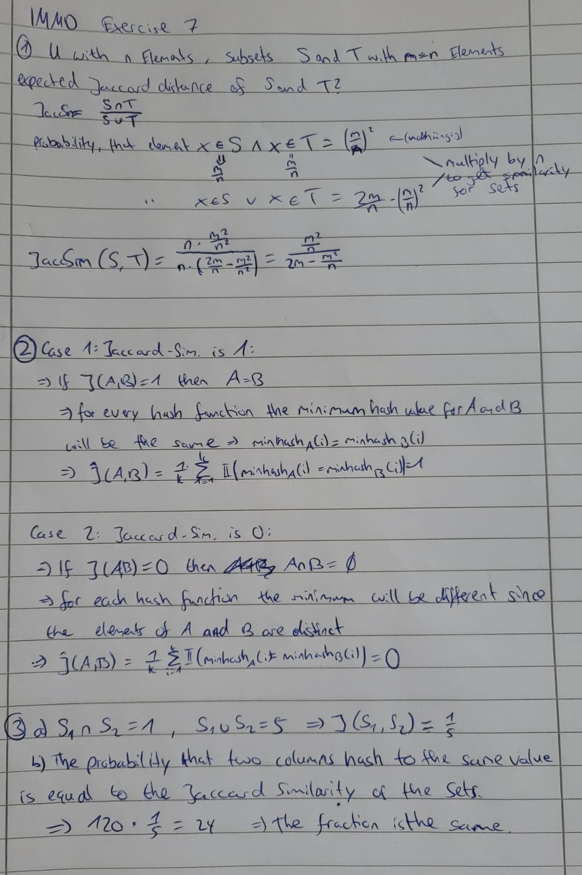

# Exercise 4

k-shingle generation from last exercise

In [2]:
import numpy as np
def get_shingles_dec(txt,k):
    
    shingles ={} 
    for i in range(len(txt)-k):
        #remove trailing zeros by converting it to int.
        subtext = str(int(txt[i:i+k]))

        if subtext not in shingles.keys():
            shingles[subtext] = True
    unsorted_pos = [int(x) for x in shingles.keys()]

    return np.sort(unsorted_pos)

with open( "pi.txt" , 'r') as file:
    txt = file.read().replace(" ","").replace(".","")
    
shingles = get_shingles_dec(txt,12)

print(shingles)

with open(r'pi_shingles.txt', 'w') as fp:
    for item in shingles:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')


[   313783875    407854733    422966171 ... 999983729780 999998372978
 999999837297]
Done


In [41]:
import numpy as np
import random
 

def h(x,N,a=37,b=126,p=(10**15 + 223)):
    return np.mod(np.mod(a*x+b,p), N) + 1

 
def create_sig_matrix(data,K,N):
    m = len(data[0])

    A =np.empty(K,dtype=np.longdouble)
    B =np.empty(K,dtype=np.longdouble)
    P = 2**31-1
    for i in range(K):
        A[i] = random.getrandbits(40)
        B[i] = random.getrandbits(40)
    
    sig_M = np.ones(shape=(K,m))*float("inf")
    
    for data_column in range(m):
        for row in range(K):    
            res= h(data[:,data_column],N, A[row],B[row],P)
            
            sig_M[row,data_column] = np.min(res)

    sig_M.astype(np.int64)
    return sig_M


N=10**12
input = np.random.randint(0,N,size=(10,5),dtype=np.int64)
Mat = create_sig_matrix(input,5,N)

print(Mat)



[[2.70853050e+07 6.44203016e+08 4.97422820e+07 4.07416800e+06
  4.70579903e+08]
 [2.09812964e+08 3.06528805e+08 5.00092406e+08 1.49664581e+08
  9.17230437e+08]
 [2.03345467e+08 1.09651284e+08 4.34167754e+08 3.68278489e+08
  2.51047529e+08]
 [1.18459075e+08 2.34395765e+08 5.03797010e+07 2.29187986e+08
  2.58460680e+07]
 [5.72737720e+07 2.49717650e+08 2.87870049e+08 2.67300500e+06
  1.07022598e+08]]


# Exercise 5

a)

In [4]:
import numpy as np
def create_dataset(m=100,q=20000,delta=0.02,N=10**8):
    C= []
    C.append( np.random.choice(np.arange(N),size=q,replace=False))
    print(C)
    for i in range(m-1):
        last_col = C[-1] 
        fract_old_values= np.random.choice(np.arange(q),size=int(delta*q),replace=False)
        replacements = np.random.randint(N,size=len(fract_old_values))
        for i in range(len(replacements)):
            while replacements[i] in last_col:
               
                print("replacing ",i)
                replacements[i] = np.random.randint(N,size=1)[0]
        
        existing_old_values = np.delete(last_col,fract_old_values)
        C.append(np.concatenate((existing_old_values,replacements)))
    return C

print(create_dataset())


[array([47560464, 49735109, 98400253, ..., 88465100, 14407140, 31379937])]
replacing  191
replacing  350
replacing  156
replacing  48
replacing  392
replacing  67
[array([47560464, 49735109, 98400253, ..., 88465100, 14407140, 31379937]), array([47560464, 49735109, 98400253, ..., 98754817, 28102136, 35181939]), array([47560464, 49735109, 98400253, ..., 88676612,  9506829, 74274427]), array([47560464, 49735109, 98400253, ..., 22665451, 90943903, 87079725]), array([47560464, 49735109, 98400253, ..., 34887510,  9087288, 66245185]), array([47560464, 49735109, 98400253, ..., 27669675, 59900990, 61441766]), array([47560464, 49735109, 98400253, ..., 76758551,  8745669, 30165721]), array([47560464, 49735109, 14709406, ..., 98217529, 26467060, 13684922]), array([47560464, 49735109, 14709406, ..., 75886764, 67334222, 90904883]), array([47560464, 49735109, 14709406, ..., 94194086, 70278277, 23502793]), array([47560464, 49735109, 14709406, ..., 12920420, 52589430, 48079749]), array([47560464, 49735

In [21]:
import numpy as np
def create_dataset(m=100,q=20000,delta=0.02,N=10**8):
    C= np.empty(shape=(q,m) )
    C[:,0]= np.random.choice(np.arange(N),size=q,replace=False)
     
    for i in range(1,m):
        
        num_elements = q
        num_to_replace = int(num_elements * delta)

        # Step 2: Get current unique values in the array
        unique_values = np.unique(C[:,i-1])
        
        # Step 3: Generate new random values that aren't in the current array
        # We can use a range of numbers that are not in unique_values
        new_values = np.random.choice(np.arange(N), num_to_replace)
        for j in range(num_to_replace):
            while new_values[j] in unique_values:
               
                #print("rerolling new value",j)
                new_values[j] = np.random.randint(N,size=1)[0]
        
        # Step 4: Randomly choose indices to replace in the array
        indices_to_replace = np.random.choice(q, num_to_replace, replace=False)
        
        C[:,i]=C[:,i-1]
        # Step 5: Replace the values at the chosen indices
        C[indices_to_replace,i] = new_values
            
            
        
        
        
        
        #last_col = C[:,i-1] 
        #fract_old_values= np.random.choice(np.arange(q),size=int(delta*q),replace=False)
        #replacements = np.random.randint(N,size=len(fract_old_values))
        #for j in range(len(replacements)):
        #    while replacements[j] in last_col:
        #       
        #        print("replacing ",j)
        #        replacements[j] = np.random.randint(N,size=1)[0]
        #
        #existing_old_values = np.delete(last_col,fract_old_values)
        #C[:,i]= np.concatenate((existing_old_values,replacements))
    return C
N=10**8
C = create_dataset(N=N)

print(C)

[[25425564. 25425564. 25425564. ... 23443398. 23443398. 23443398.]
 [74052716. 74052716. 74052716. ... 61430029. 61430029. 61430029.]
 [70885014. 70885014. 70885014. ... 99212016. 99212016. 99212016.]
 ...
 [42895579. 42895579. 42895579. ... 42895579. 42895579. 42895579.]
 [30348033. 30348033. 30348033. ... 24719741. 24719741. 24719741.]
 [49201515. 49201515. 49201515. ... 49201515. 49201515. 49201515.]]


b)

In [42]:
Mat5 =create_sig_matrix(C,100,N)


print(Mat5)


[[ 84170.  84170.  84170. ...  71148.  44493.  44493.]
 [ 31528.  31528.  31528. ...  28971.  28971.  28971.]
 [ 52626.  52626.  52626. ... 202488. 202488. 202488.]
 ...
 [147472. 147472. 147472. ...  13832.  13832.  13832.]
 [ 22708.  22708.  22708. ... 206894. 206894. 206894.]
 [298333. 298333. 298333. ...   1231.   1231.   1231.]]


c)

we print it as a matrix, element [i,j] is the jacard sim of column i and j. This means our result is an upper right diagonal matrix, with and empty diagonal (technically the diagonal is equal to one as we compare a column with itself there)

In [69]:
def jaccard_sim(c1,c2):
    n=len(c1)
    map = {}
    # For each element of A
    # increase it's instance by 1.
    for i in range(n):
       map[c1[i]] = 1
        
             
    # For each element of B
    # decrease it's instance by 1.
    for i in range(n):
        if c2[i] in map:
            map[c2[i]] += 1
        else:
            map[c2[i]] = 1
 
    # Iterate through map  
    intersect=0
    union = 0
    for i in map:
        if (map[i] == 2):
           intersect+=1
        elif (map[i]==1):
            union+=1
    return intersect/(intersect+union)
 
m=len(C[0])
jac_mat = np.zeros(shape=(m,m))
for i in range(m):
    
    for j in range(i+1,m):
        jac_mat[i,j] = jaccard_sim(C[:,i],C[:,j])
print(jac_mat)

[[0.         0.96078431 0.92316938 ... 0.07633937 0.07463328 0.07339326]
 [0.         0.         0.96078431 ... 0.07802183 0.07628145 0.07495096]
 [0.         0.         0.         ... 0.07970956 0.07790563 0.07657112]
 ...
 [0.         0.         0.         ... 0.         0.96078431 0.92353931]
 [0.         0.         0.         ... 0.         0.         0.96078431]
 [0.         0.         0.         ... 0.         0.         0.        ]]


as expected, the further the values are away from the diagonal, the lesser the similiarity becomes, as more and more vallues are swapped between the two columns.

# Exercise 6

a+b)

In [45]:
import xxhash
from collections import defaultdict

def LSH(sig_m,b,r,s,N):
    K = len(sig_m)
    m = len(sig_m[0])
    hashs =[]
    band_buckets =[]
    rdm_seeds = np.random.randint(N,size=b)
    for i in range(b):
       hashs.append( xxhash.xxh32(seed=rdm_seeds[i]))
    for i in range(b):
        def_dict =defaultdict(list)
        for col in range(m):
            hashs[i].reset()
            for j in range(r):
                hashs[i].update(str(int(sig_m[i*r+j,col])))
                
            def_dict[hashs[i].digest()].append(col)
        band_buckets.append(def_dict)
    return band_buckets


band_buckets = LSH(Mat5,b=20,r=5,s=0.8,N=10**8)

 

In [49]:
#print(Mat5[0:5,:])
#x = xxhash.xxh32(seed=0)
#print(x.digest())
#x.update(str(1))
#print(x.digest())
#x.reset()
#print(x.digest())
for i in range(20):

    print(band_buckets[i])

defaultdict(<class 'list'>, {b'\x11\xfaP\x9a': [0, 1, 2, 3, 4], b'\xd3k\x93\xa0': [5, 6], b'#\xfbA\xef': [7, 8, 9, 10, 11, 12], b'\xb7k\x8e/': [13, 14, 15, 16], b'p3\xf6\x11': [17, 18], b'\xa5\xd6\x9ea': [19, 20], b'\x12F)\x9c': [21, 22, 23, 24], b'Hk/\x1e': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], b'\x9e\xceuD': [52], b'\xd5 \x1e\xf0': [53, 54, 55, 56], b'\xf3UPO': [57, 58], b'\xbc\xe7\x99*': [59, 60, 61], b'2v\x97\xa9': [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77], b'(\xd7\xfc\x1b': [78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88], b'\xad\x06^\x91': [89, 90, 91], b'\xd9\x05\xbe_': [92, 93, 94, 95], b'\xd73\xe0q': [96, 97], b'8u\x94K': [98, 99]})
defaultdict(<class 'list'>, {b'\x8a\xc5\xa1\xcc': [0, 1, 2, 3, 4], b'$\x0b2\x02': [5, 6, 7, 8, 9, 10], b'\r!\x01\xc1': [11, 12, 13, 14, 15, 16, 17, 18, 19], b'e2\xabg': [20, 21], b'gOT\x9f': [22, 23], b'~\x9e\xfc\x16': [24, 25, 26], b'*\xcfZ\xa1': [27], b'DM\

as you can see, a lot of columns match in the same bucket, which makes sense, as the difference between two different columns from our example above is not that high.

# Exercise 7

a)

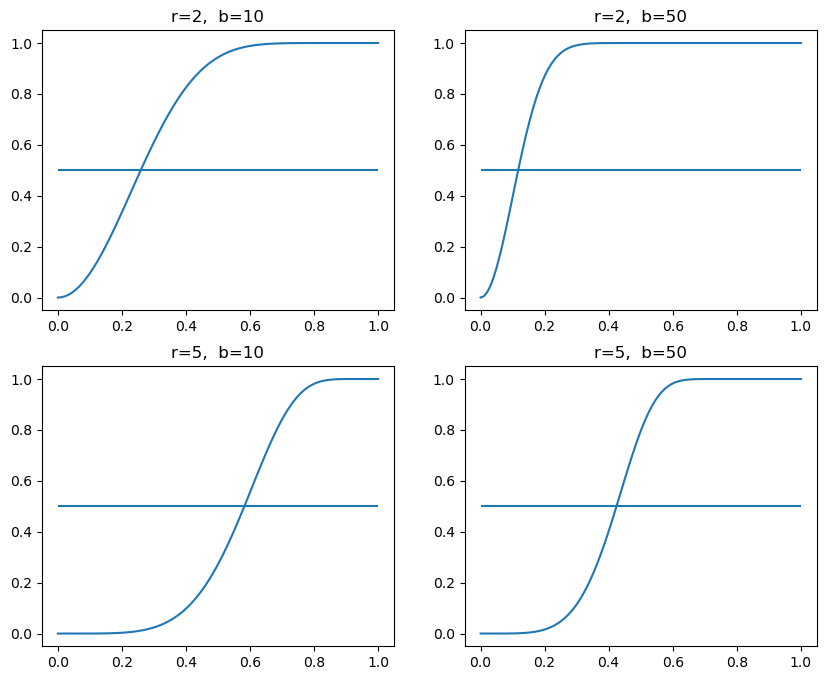

In [56]:
import matplotlib.pyplot as plt

xmesh = np.linspace(0,1,100)
 
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

 
i=0
for r in [2,5]:
    j=0
    for b in [10,50]:
       axs[i,j].plot(xmesh, 1-(1-xmesh**r)**b)
       axs[i, j].set_title('r='+str(r)+",  b="+str(b))
       axs[i,j].hlines(0.5,0,1)
       j+=1
    i+=1

the points where each curves hit 0.5 seem to be the following:

|r\b | 10 | 50 |
|:--:|:--:|:--:|
|2  | 0.25  | 0.12    |
|5  | 0.58  |  0.42   |

b)

The highest ascend is exactly the point where y=0.5

1-(1-x**r)**b = 0.5

=> (1-x**r)**b = 0.5

=> 1-x**r = 0.5**(1/b)

=> x**r = -(0.5**(1/b)+1

=> x = -(0.5**(1/b)+1)**(1/r)

=> x = -(0.5**(1/b)+1)**(1/r)

In [64]:
for r in [2,5]:
    for b in [10,50]:
        print("R:",r,",b:",b,", result:",(-(0.5**(1/b))+1)**(1/r))


R: 2 ,b: 10 , result: 0.2587798455506004
R: 2 ,b: 50 , result: 0.11733411910710712
R: 5 ,b: 10 , result: 0.5823340432817862
R: 5 ,b: 50 , result: 0.4243944803687326


i am surprised how precise my own esimations were to be honest